In [1]:
# This is an example of the comparison of data cubes using the HOG technique
#
# Prepared by Juan D. Soler (soler@mpia.de)

import sys
sys.path.append('../')
from astrohog2d import *
from astrohog2d1v import *

import matplotlib.pyplot as plt
from astropy.io import fits

from scipy import ndimage
from rgbtools import *

In [2]:
# Load the cubes that you plan to compare
# Just for reference, I assume that the first index runs over the non-spatial coordinate
# Also assume that the cubes are spatially aligned and are reprojected into the same grid 

hdul = fits.open('../data/testcube1.fits')
cube1=hdul[0].data
hdul.close()
hdul = fits.open('../data/testcube2.fits')
cube2=hdul[0].data
hdul.close()

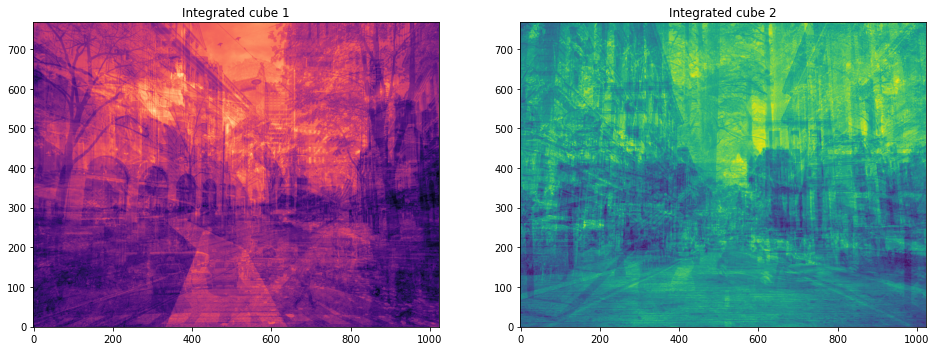

In [3]:
fig, ax = plt.subplots(1,2, figsize=(16., 12.))
ax[0].imshow(cube1.sum(axis=0), origin='lower', cmap='magma')
ax[0].set_title('Integrated cube 1')
ax[1].imshow(cube2.sum(axis=0), origin='lower', cmap='viridis')
ax[1].set_title('Integrated cube 2')
plt.show()

In [4]:
# Here you select the size of your derivative kernel in pixels
ksz=10

In [5]:
# Here I define the masks for both cubes
# For the sake of simplicity, I'm only masking the edges of the cubes
sz1=np.shape(cube1)
mask1=1.+0.*cube1
mask1[:,0:ksz,:]=0.
mask1[:,sz1[1]-1-ksz:sz1[1]-1,:]=0.
mask1[:,:,0:ksz]=0.
mask1[:,:,sz1[2]-1-ksz:sz1[2]-1]=0.
sz2=np.shape(cube2)
mask2=1.+0.*cube2
mask2[:,0:ksz,:]=0.
mask2[:,sz2[1]-1-ksz:sz2[1]-1,:]=0.
mask2[:,:,0:ksz]=0.
mask2[:,:,sz2[2]-1-ksz:sz2[2]-1]=0.

In [6]:
# Here you define the channel ranges over which you want to compare the cubes
zmin1=0
zmax1=sz1[0]-1
zmin2=0
zmax2=sz2[0]-1

In [9]:
# Run the HOG
circstats, corrcube, scube1, scube2 = HOGcorr_ppvcubes(cube1, cube2, zmin1, zmax1, zmin2, zmax2, ksz=ksz, mask1=mask1, mask2=mask2)

  0%|          | 0/25 [00:00<?, ?it/s]

Computing HOG correlation
6 6
Channel 0/5 and 0/5
Montecarlo iterations disabled =============================


  4%|▍         | 1/25 [00:00<00:09,  2.53it/s]

Channel 0/5 and 1/5
Montecarlo iterations disabled =============================


  8%|▊         | 2/25 [00:00<00:10,  2.29it/s]

Channel 0/5 and 2/5
Montecarlo iterations disabled =============================


 12%|█▏        | 3/25 [00:01<00:09,  2.31it/s]

Channel 0/5 and 3/5
Montecarlo iterations disabled =============================


 16%|█▌        | 4/25 [00:01<00:08,  2.34it/s]

Channel 0/5 and 4/5
Montecarlo iterations disabled =============================


 20%|██        | 5/25 [00:02<00:08,  2.40it/s]

Channel 0/5 and 5/5
Montecarlo iterations disabled =============================


 24%|██▍       | 6/25 [00:02<00:07,  2.45it/s]

Channel 1/5 and 0/5
Montecarlo iterations disabled =============================


 28%|██▊       | 7/25 [00:02<00:07,  2.44it/s]

Channel 1/5 and 1/5
Montecarlo iterations disabled =============================


 32%|███▏      | 8/25 [00:03<00:06,  2.45it/s]

Channel 1/5 and 2/5
Montecarlo iterations disabled =============================


 36%|███▌      | 9/25 [00:03<00:06,  2.45it/s]

Channel 1/5 and 3/5
Montecarlo iterations disabled =============================


 40%|████      | 10/25 [00:04<00:06,  2.42it/s]

Channel 1/5 and 4/5
Montecarlo iterations disabled =============================


 44%|████▍     | 11/25 [00:04<00:05,  2.46it/s]

Channel 1/5 and 5/5
Montecarlo iterations disabled =============================


 48%|████▊     | 12/25 [00:04<00:05,  2.46it/s]

Channel 2/5 and 0/5
Montecarlo iterations disabled =============================


 52%|█████▏    | 13/25 [00:05<00:04,  2.45it/s]

Channel 2/5 and 1/5
Montecarlo iterations disabled =============================


 56%|█████▌    | 14/25 [00:05<00:04,  2.47it/s]

Channel 2/5 and 2/5
Montecarlo iterations disabled =============================


 60%|██████    | 15/25 [00:06<00:03,  2.52it/s]

Channel 2/5 and 3/5
Montecarlo iterations disabled =============================


 64%|██████▍   | 16/25 [00:06<00:03,  2.48it/s]

Channel 2/5 and 4/5
Montecarlo iterations disabled =============================


 68%|██████▊   | 17/25 [00:06<00:03,  2.50it/s]

Channel 2/5 and 5/5
Montecarlo iterations disabled =============================


 72%|███████▏  | 18/25 [00:07<00:02,  2.51it/s]

Channel 3/5 and 0/5
Montecarlo iterations disabled =============================


 76%|███████▌  | 19/25 [00:07<00:02,  2.51it/s]

Channel 3/5 and 1/5
Montecarlo iterations disabled =============================


 80%|████████  | 20/25 [00:08<00:01,  2.50it/s]

Channel 3/5 and 2/5
Montecarlo iterations disabled =============================


 84%|████████▍ | 21/25 [00:08<00:01,  2.49it/s]

Channel 3/5 and 3/5
Montecarlo iterations disabled =============================


 88%|████████▊ | 22/25 [00:08<00:01,  2.46it/s]

Channel 3/5 and 4/5
Montecarlo iterations disabled =============================


 92%|█████████▏| 23/25 [00:09<00:00,  2.47it/s]

Channel 3/5 and 5/5
Montecarlo iterations disabled =============================


 96%|█████████▌| 24/25 [00:09<00:00,  2.51it/s]

Channel 4/5 and 0/5
Montecarlo iterations disabled =============================


100%|██████████| 25/25 [00:10<00:00,  2.51it/s]

Channel 4/5 and 1/5
Montecarlo iterations disabled =============================


26it [00:10,  2.46it/s]                        

Channel 4/5 and 2/5
Montecarlo iterations disabled =============================


27it [00:11,  2.36it/s]

Channel 4/5 and 3/5
Montecarlo iterations disabled =============================


28it [00:11,  2.36it/s]

Channel 4/5 and 4/5
Montecarlo iterations disabled =============================


29it [00:11,  2.34it/s]

Channel 4/5 and 5/5
Montecarlo iterations disabled =============================


30it [00:12,  2.36it/s]

Channel 5/5 and 0/5
Montecarlo iterations disabled =============================


31it [00:12,  2.43it/s]

Channel 5/5 and 1/5
Montecarlo iterations disabled =============================


32it [00:13,  2.46it/s]

Channel 5/5 and 2/5
Montecarlo iterations disabled =============================


33it [00:13,  2.51it/s]

Channel 5/5 and 3/5
Montecarlo iterations disabled =============================


34it [00:13,  2.55it/s]

Channel 5/5 and 4/5
Montecarlo iterations disabled =============================


35it [00:14,  2.59it/s]

Channel 5/5 and 5/5
Montecarlo iterations disabled =============================


36it [00:14,  2.47it/s]


In [10]:
# The outputs are: 
# 1. 'corrplane' an array with all of the metrics to evaluate the correlation between the cubes
np.shape(circstats['V'])

(6, 6)

In [11]:
# 2. 'corrcube', which is the array containing all the relative orientation angles between gradients
np.shape(corrcube)

(6, 6, 768, 1024)

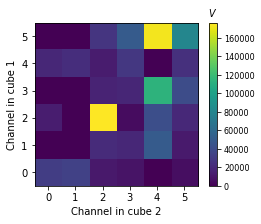

In [14]:
# Here for example, we show the projected Rayleight statistic (V)
# Large V values indicate that the angle distribution is not flat and is centred on zero
# V values around zero correspond to a flat angle distribution.

fig, ax = plt.subplots(1,1, figsize=(4., 3.))
plt.rc('font', size=8)
im=plt.imshow(circstats['V'], origin='lower',clim=[0.,np.nanmax(circstats['V'])], interpolation='None')
plt.xlabel('Channel in cube 2')
plt.ylabel('Channel in cube 1')
cbl=plt.colorbar(im)
cbl.ax.set_title(r'$V$')
plt.show()

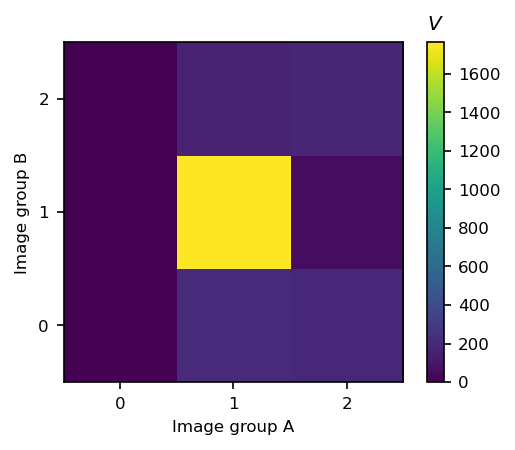

In [16]:
# Here for example, we show the projected Rayleight statistic (V)
# Large V values indicate that the angle distribution is not flat and is centred on zero
# V values around zero correspond to a flat angle distribution.
vplane =corrplane['V']

fig, ax = plt.subplots(1,1, figsize=(4., 3.), dpi=150)
plt.rc('font', size=8)
im=plt.imshow(vplane[1:4,1:4]/100.,origin='lower',clim=[0.,np.max(vplane/100.)],interpolation='None')
plt.xlabel('Image group A')
plt.ylabel('Image group B')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
cbl=plt.colorbar(im)
cbl.ax.set_title(r'$V$')
plt.show()

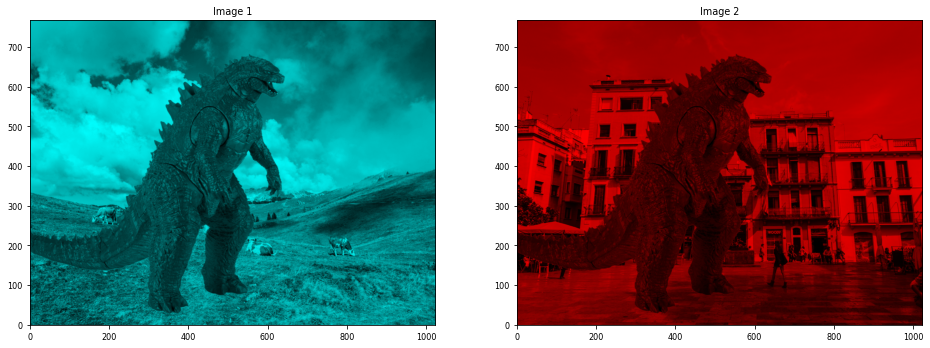

In [17]:
# Plot the pair of channels with the highest spatial correlations
indmax1, indmax2 =(vplane == np.max(vplane[np.isfinite(vplane)])).nonzero()

fig, ax = plt.subplots(1,2, figsize=(16., 12.))
ax[0].imshow(cube1[indmax1[0],:,:], origin='lower', cmap=tealct())
ax[0].set_title('Image 1')
ax[1].imshow(cube2[indmax2[0],:,:], origin='lower', cmap=redct())
ax[1].set_title('Image 2')
plt.show()


In [18]:
np.abs(corrcube[indmax1[0],indmax2[0],:,:])

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
        0.66529691]])

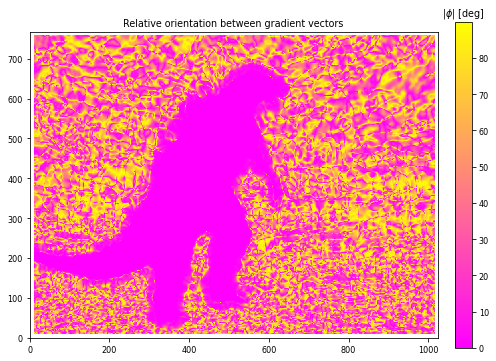

In [19]:
#
fig, ax = plt.subplots(1,1, figsize=(8., 6.))
im=plt.imshow(np.abs(corrcube[indmax1[0],indmax2[0],:,:])*180.0/np.pi, origin='lower', cmap='spring',interpolation='None')
cbl=plt.colorbar(im,fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$|\phi|$ [deg]')
ax.set_title('Relative orientation between gradient vectors')
plt.show()

In [20]:
vblocks=imablockaverage(corrcube[indmax1[0],indmax2[0],:,:], nbx=7, nby=10, weight=(1./ksz)**2)

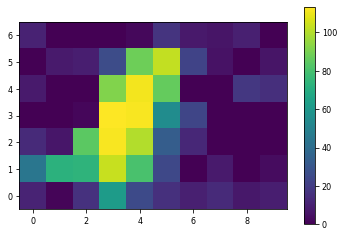

In [21]:
plt.imshow(vblocks, origin='lower', vmin=0.)
plt.colorbar()
plt.show()